# Red Wine Quality

Data Description

The task is to train a classification model to predict the quality of a Red Wine which ranges between the score 0 and 10.The dataset contains 11 different input variables based on physiochemical tests which helps us in predicting the Red Wine Quality.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'C:\Users\HP-15\Data Trained Projects\winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


Gaining some info about Dataset

In [3]:
df.shape

(1599, 12)

In [4]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Getting information about mean,count,std and quartiles of columns

In [10]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

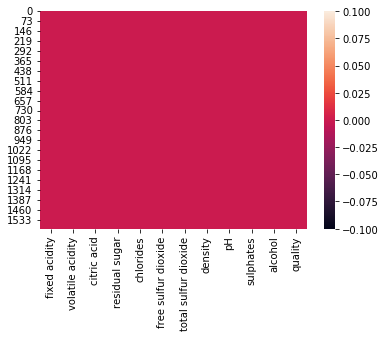

In [11]:
sns.heatmap(df.isnull())

We can see there is no null value in the above dataset

# Starting With EDA

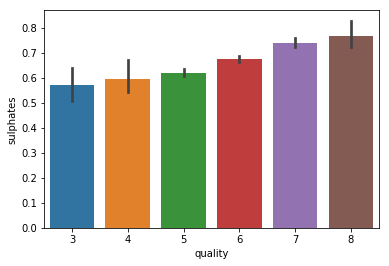

In [12]:
#quality vs sulphates
sns.barplot(x='quality',y='sulphates',data=df)

Quality increases as the sulphates increases

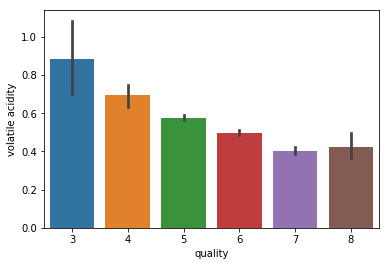

In [13]:
#quality vs volatile acidity
sns.barplot(x ='quality',y='volatile acidity',data=df)

Quality decreases as the volatile acidity increases 

In [14]:
#showing counts before categorizing quality column
df['quality'].value_counts()


5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [15]:
#categorize wine quality
bins = (2,6.5,8)
group_names = ['bad','good']
categories = pd.cut(df['quality'], bins, labels = group_names)
df['quality'] = categories


In [16]:
#showing counts after categorizing quality column
df['quality'].value_counts()

bad     1382
good     217
Name: quality, dtype: int64

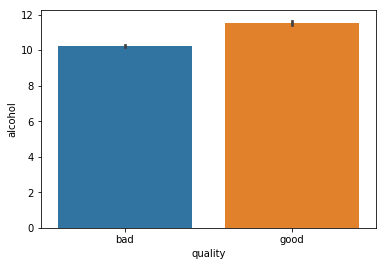

In [17]:
#barplot of quality vs alcohol.
# more alcohol, better red wine
sns.barplot(x='quality', y='alcohol',data=df)


fixed acidity              AxesSubplot(0.125,0.536818;0.110714x0.343182)
volatile acidity        AxesSubplot(0.257857,0.536818;0.110714x0.343182)
citric acid             AxesSubplot(0.390714,0.536818;0.110714x0.343182)
residual sugar          AxesSubplot(0.523571,0.536818;0.110714x0.343182)
chlorides               AxesSubplot(0.656429,0.536818;0.110714x0.343182)
free sulfur dioxide     AxesSubplot(0.789286,0.536818;0.110714x0.343182)
total sulfur dioxide          AxesSubplot(0.125,0.125;0.110714x0.343182)
density                    AxesSubplot(0.257857,0.125;0.110714x0.343182)
pH                         AxesSubplot(0.390714,0.125;0.110714x0.343182)
sulphates                  AxesSubplot(0.523571,0.125;0.110714x0.343182)
alcohol                    AxesSubplot(0.656429,0.125;0.110714x0.343182)
dtype: object

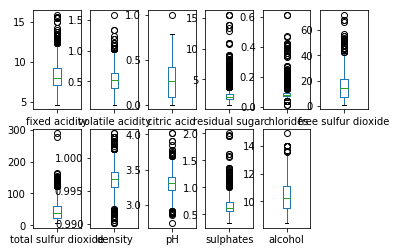

In [18]:
df.plot(kind='box',subplots=True,layout=(2,6))

We can see that there are too many outliers present in residual sugar and chlorides

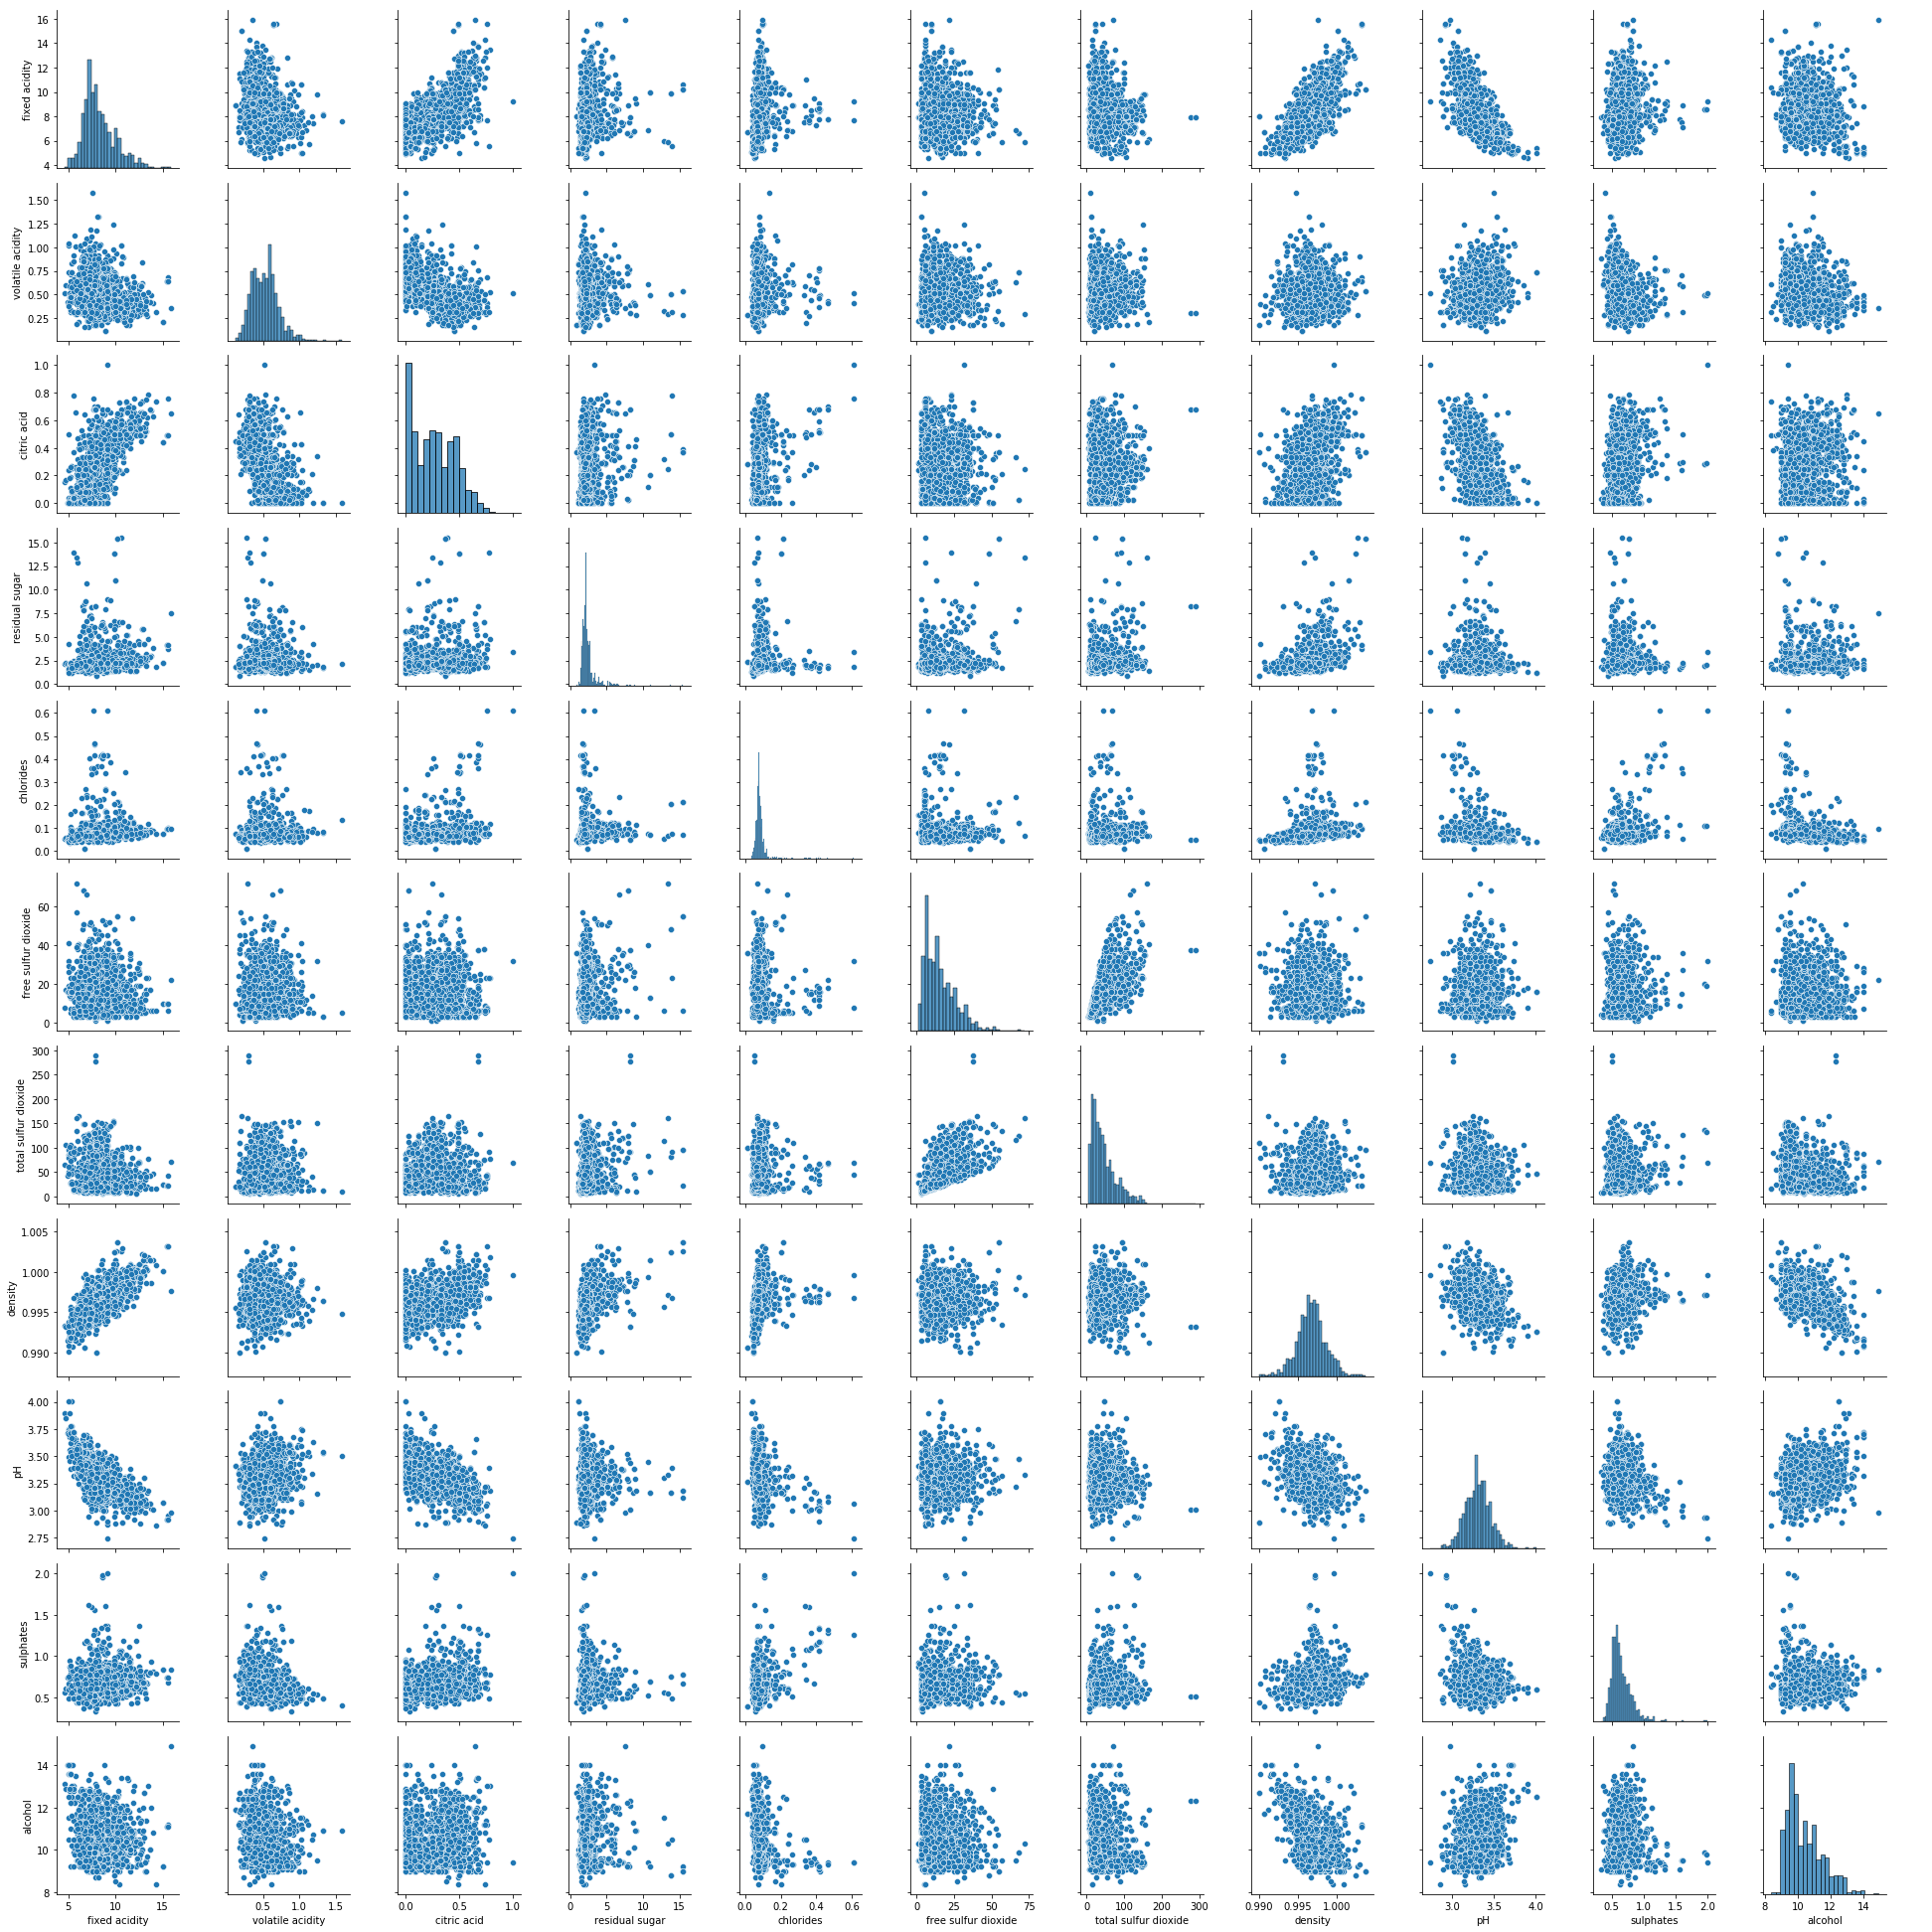

In [19]:
sns.pairplot(df)

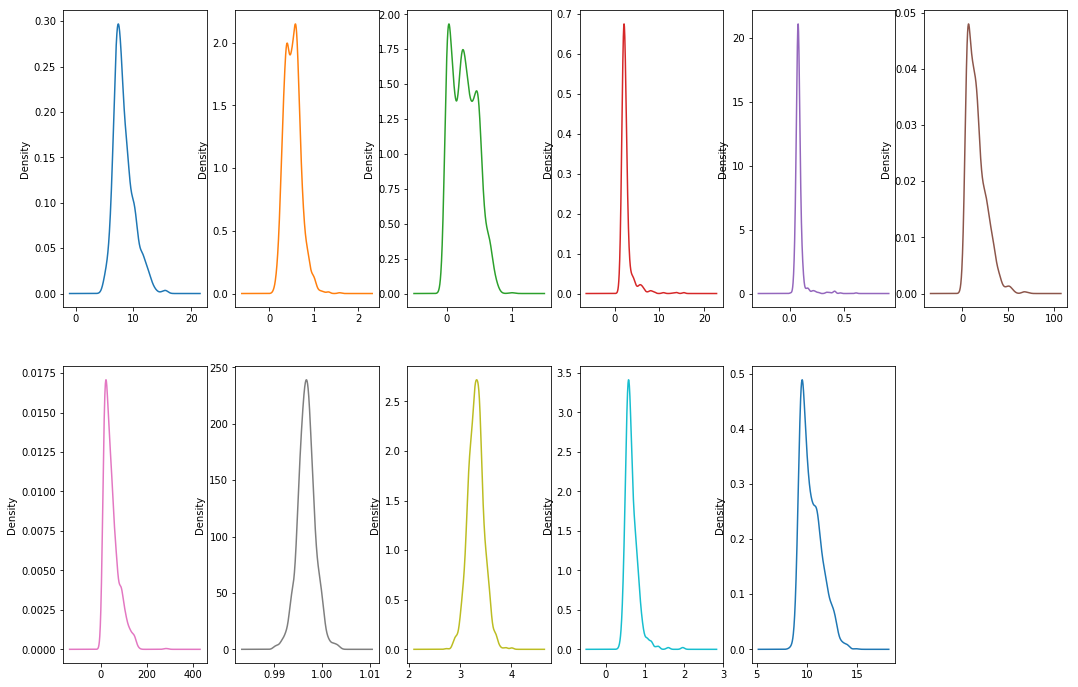

In [20]:
df.plot(kind='density',subplots=True,layout=(2,6),legend=False,sharex=False,figsize=(18,12))
plt.show()

 Again we can observe too much skewness in residual sugar and chlorides columns in data from the above graph

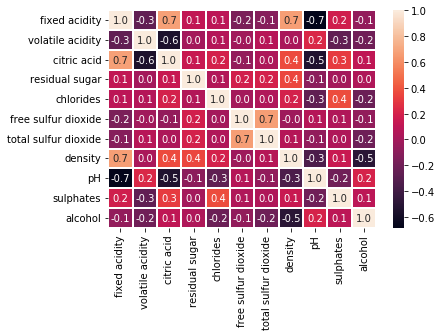

<Figure size 1296x1296 with 0 Axes>

In [21]:
#Observing correlation between variables
sns.heatmap(df.corr(), annot=True, linewidths=1, fmt= '.1f')
plt.figure(figsize=(18,18))
plt.show()

We can observe that quality is more correlated to alcohol,sulphates and citric acid

In [22]:
#We drop resiual sugar and chlorides as it has lots of outliers present in the data
df.drop(['residual sugar','chlorides'],axis=1,inplace=True)

In [23]:
df.head()

,fixed acidity,volatile acidity,citric acid,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,17.0,60.0,0.9980,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [24]:
#splitting the independent and target variables in x and y
x=df.drop('quality',axis=1)
y=df['quality']

In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
y

array([0, 0, 0, ..., 0, 0, 0])

In [26]:
#removing outliers
from scipy.stats import zscore
z=np.abs(zscore(x))
z

array([[0.52835961, 0.96187667, 1.39147228, ..., 1.28864292, 0.57920652,
        0.96024611],
       [0.29854743, 1.96744245, 1.39147228, ..., 0.7199333 , 0.1289504 ,
        0.58477711],
       [0.29854743, 1.29706527, 1.18607043, ..., 0.33117661, 0.04808883,
        0.58477711],
       ...,
       [1.1603431 , 0.09955388, 0.72391627, ..., 0.70550789, 0.54204194,
        0.54162988],
       [1.39015528, 0.65462046, 0.77526673, ..., 1.6773996 , 0.30598963,
        0.20930812],
       [1.33270223, 1.21684919, 1.02199944, ..., 0.51112954, 0.01092425,
        0.54162988]])

In [27]:
threshold=3
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   38,   43,   45,   57,   81,   86,
         88,   91,   92,   95,  106,  109,  120,  126,  127,  142,  144,
        151,  151,  151,  169,  199,  226,  243,  244,  258,  339,  340,
        347,  354,  374,  381,  391,  396,  400,  442,  442,  467,  480,
        515,  544,  554,  554,  555,  555,  557,  557,  584,  588,  591,
        608,  614,  636,  639,  649,  651,  652,  652,  672,  672,  684,
        690,  692,  695,  723,  724,  795,  821,  836,  837,  889,  925,
        926,  982, 1017, 1018, 1051, 1079, 1081, 1111, 1114, 1131, 1154,
       1175, 1231, 1244, 1244, 1269, 1269, 1270, 1270, 1288, 1289, 1295,
       1296, 1299, 1300, 1312, 1316, 1319, 1321, 1358, 1367, 1370, 1372,
       1434, 1434, 1435, 1435, 1474, 1474, 1476, 1476, 1493, 1496, 1558],
      dtype=int64), array([7, 3, 3, 4, 7, 1, 7, 6, 3, 7, 7, 7, 7, 7, 6, 7, 4, 1, 1, 1, 8, 8,
       2, 6, 7, 7, 1, 7, 0, 0, 7, 7, 7, 0, 4, 0, 0, 0, 3, 3, 0, 5, 8, 5,
       4, 0, 0, 5, 0, 5, 0, 5

In [28]:
df_new=df[(z<3).all(axis=1)]
df_new

,fixed acidity,volatile acidity,citric acid,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,11.0,34.0,0.99780,3.51,0.56,9.4,bad
1,7.8,0.880,0.00,25.0,67.0,0.99680,3.20,0.68,9.8,bad
2,7.8,0.760,0.04,15.0,54.0,0.99700,3.26,0.65,9.8,bad
3,11.2,0.280,0.56,17.0,60.0,0.99800,3.16,0.58,9.8,bad
4,7.4,0.700,0.00,11.0,34.0,0.99780,3.51,0.56,9.4,bad
5,7.4,0.660,0.00,13.0,40.0,0.99780,3.51,0.56,9.4,bad
6,7.9,0.600,0.06,15.0,59.0,0.99640,3.30,0.46,9.4,bad
7,7.3,0.650,0.00,15.0,21.0,0.99460,3.39,0.47,10.0,good
8,7.8,0.580,0.02,9.0,18.0,0.99680,3.36,0.57,9.5,good
9,7.5,0.500,0.36,17.0,102.0,0.99780,3.35,0.80,10.5,bad


In [29]:
df.shape

(1599, 10)

In [30]:
df_new.shape

(1494, 10)

We have removed the outliers, now lets check skewness

In [31]:
x.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
dtype: float64

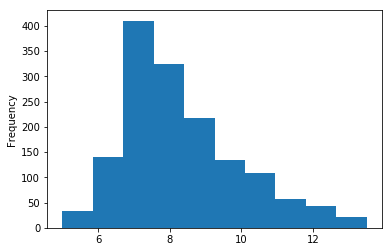

In [32]:
df_new['fixed acidity'].plot.hist()

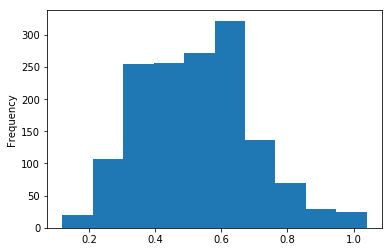

In [33]:
df_new['volatile acidity'].plot.hist()

We can see that the skewness of data has reduced

# Finding Best random State

In [34]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is ',maxAccu," on Random_state",maxRS)

Best accuracy is  0.9147727272727273  on Random_state 38


In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=179)

In [36]:
lr=LogisticRegression()
dt=DecisionTreeClassifier()
gnb=GaussianNB()
model=[LogisticRegression(),DecisionTreeClassifier(),GaussianNB()]

In [37]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False) is:
0.884375
[[275   5]
 [ 32   8]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       280
           1       0.62      0.20      0.30        40

   micro avg       0.88      0.88      0.88       320
   macro avg       0.76      0.59      0.62       320
weighted avg       0.86      0.88      0.86       320



Accuracy score of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            sp

We are getting highest accuracy with Logistic Regression(93.97%) but it can be due to overfitting also so we will check cross validation scores.

In [38]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.884375
[[275   5]
 [ 32   8]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       280
           1       0.62      0.20      0.30        40

   micro avg       0.88      0.88      0.88       320
   macro avg       0.76      0.59      0.62       320
weighted avg       0.86      0.88      0.86       320



In [39]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.90625
[[265  15]
 [ 15  25]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       280
           1       0.62      0.62      0.62        40

   micro avg       0.91      0.91      0.91       320
   macro avg       0.79      0.79      0.79       320
weighted avg       0.91      0.91      0.91       320



In [40]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
pred=gnb.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.859375
[[250  30]
 [ 15  25]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.92       280
           1       0.45      0.62      0.53        40

   micro avg       0.86      0.86      0.86       320
   macro avg       0.70      0.76      0.72       320
weighted avg       0.88      0.86      0.87       320



In [41]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(lr,x,y,cv=10)
print("Cross Validation score of LogisticRegression model: ",scr.mean())

Cross Validation score of LogisticRegression model:  0.8680561252392671


In [42]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(dt,x,y,cv=10)
print("Cross Validation score of DecisionTreeClassifier model: ",scr.mean())

Cross Validation score of DecisionTreeClassifier model:  0.8310554855658424


In [43]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(gnb,x,y,cv=10)
print("Cross Validation score of GaussianNB model: ",scr.mean())

Cross Validation score of GaussianNB model:  0.8467514356029533


We can conclude that GaussianNB is the best fit model as the difference of accuracy score between the GNB model and the GNB cross validation model is very less

# Hyper Parameter tuning for best fit model

In [44]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score


In [45]:
y_pred_prob=lr.predict_proba(x_test)[:,1]

In [46]:
y_pred_prob

array([0.12357693, 0.03585764, 0.01421307, 0.13864932, 0.4005166 ,
       0.10076847, 0.06630771, 0.03616363, 0.29816075, 0.11618439,
       0.01758844, 0.08408281, 0.12445015, 0.05790208, 0.02057051,
       0.02149853, 0.01997875, 0.04285772, 0.03448856, 0.09432029,
       0.59854499, 0.01173675, 0.42425034, 0.23038003, 0.05240023,
       0.01636662, 0.00827407, 0.36871194, 0.10198771, 0.08564615,
       0.14495561, 0.17321539, 0.29676105, 0.34607524, 0.06702502,
       0.04714112, 0.33984341, 0.01055351, 0.04415951, 0.4059177 ,
       0.03959745, 0.15079737, 0.0126482 , 0.01984627, 0.15361706,
       0.09270254, 0.02343807, 0.13534359, 0.02464141, 0.25793339,
       0.03156563, 0.06981305, 0.36789033, 0.02255704, 0.04329466,
       0.23189787, 0.05133437, 0.00501747, 0.30764791, 0.15688242,
       0.30535144, 0.04021996, 0.13859824, 0.02078194, 0.60423508,
       0.03294402, 0.00590761, 0.04182858, 0.03596727, 0.03049371,
       0.11339825, 0.22053997, 0.1354419 , 0.08500161, 0.05782

In [47]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [48]:
fpr

array([0.        , 0.00357143, 0.00357143, 0.00714286, 0.00714286,
       0.01428571, 0.01428571, 0.01785714, 0.01785714, 0.02142857,
       0.02857143, 0.03214286, 0.03214286, 0.03928571, 0.03928571,
       0.05357143, 0.05357143, 0.06428571, 0.06428571, 0.07142857,
       0.07142857, 0.07857143, 0.07857143, 0.07857143, 0.08928571,
       0.08928571, 0.09285714, 0.1       , 0.10714286, 0.10714286,
       0.13571429, 0.13571429, 0.14642857, 0.14642857, 0.15357143,
       0.16071429, 0.18571429, 0.18571429, 0.18928571, 0.18928571,
       0.25357143, 0.25357143, 0.28214286, 0.28214286, 0.29285714,
       0.29285714, 0.30714286, 0.31428571, 0.31428571, 0.33214286,
       0.33214286, 0.35714286, 0.35714286, 0.40357143, 0.41071429,
       0.475     , 0.475     , 0.66428571, 0.66428571, 0.725     ,
       0.73214286, 0.775     , 0.775     , 1.        ])

In [49]:
tpr

array([0.   , 0.   , 0.075, 0.075, 0.125, 0.125, 0.15 , 0.15 , 0.275,
       0.275, 0.275, 0.275, 0.4  , 0.4  , 0.425, 0.425, 0.475, 0.475,
       0.5  , 0.5  , 0.525, 0.525, 0.575, 0.6  , 0.6  , 0.625, 0.625,
       0.625, 0.625, 0.65 , 0.65 , 0.675, 0.675, 0.7  , 0.7  , 0.7  ,
       0.7  , 0.75 , 0.75 , 0.775, 0.775, 0.8  , 0.8  , 0.825, 0.825,
       0.85 , 0.85 , 0.85 , 0.875, 0.875, 0.9  , 0.9  , 0.925, 0.925,
       0.925, 0.925, 0.95 , 0.95 , 0.975, 0.975, 0.975, 0.975, 1.   ,
       1.   ])

In [50]:
thresholds

array([1.78191332, 0.78191332, 0.60589274, 0.60423508, 0.59854499,
       0.58071579, 0.5591214 , 0.55386845, 0.49067954, 0.46879536,
       0.44020277, 0.43651699, 0.37139029, 0.36842285, 0.36789033,
       0.34607524, 0.33984341, 0.32043365, 0.31625713, 0.30535144,
       0.30462597, 0.29676105, 0.28863559, 0.28177858, 0.264593  ,
       0.26205979, 0.26144032, 0.25793339, 0.23948965, 0.23894715,
       0.22053997, 0.22034655, 0.20989799, 0.19282065, 0.18157977,
       0.17321539, 0.15079737, 0.1488675 , 0.14647576, 0.14495561,
       0.11890717, 0.11830686, 0.10985612, 0.10883261, 0.10624326,
       0.10569231, 0.10198771, 0.10076847, 0.09845366, 0.09432029,
       0.09348737, 0.08559018, 0.08512493, 0.06992192, 0.06981305,
       0.05794653, 0.05790208, 0.03090909, 0.03085066, 0.02464141,
       0.02458494, 0.02228356, 0.02219492, 0.00199474])

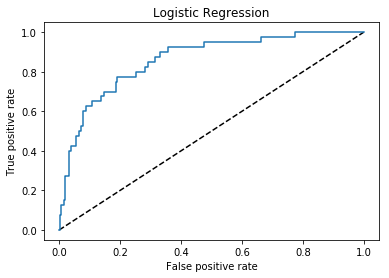

In [51]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()

In [52]:
auc_score=roc_auc_score(y_test,lr.predict(x_test))

In [53]:
print(auc_score)

0.5910714285714285


The auc score of Logistic Regression is 59%

In [54]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
p=gnb.predict(x_test)
print(accuracy_score(y_test,p))

0.859375


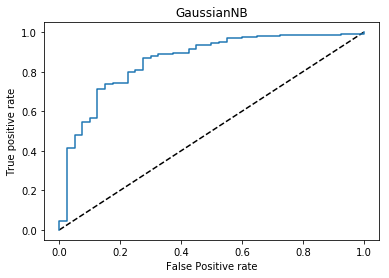

0.7589285714285715

In [55]:
#GaussianNB Curve

y_pred_prob=gnb.predict_proba(x_test)[:,0]
tpr,fpr,threshold=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='GaussianNB')
plt.xlabel('False Positive rate')
plt.ylabel('True positive rate')
plt.title('GaussianNB')
plt.show()
auc_score=roc_auc_score(y_test,gnb.predict(x_test))
auc_score

The auc score of GaussianNB is 75.89%. Hence GaussianNB is the best model for this classification problem

# Saving the Best Model

In [56]:
from sklearn.externals import joblib
joblib.dump(gnb,'gnbfile.obj')

['gnbfile.obj']